## ĐỒ ÁN CUỐI KÌ : LẬP TRÌNH CHO KHOA HỌC DỮ LIỆU

**Họ và Tên: Đào Thanh Thiện**

**MSSV: 1712782**

## I. DỮ LIỆU

Dữ liệu này bắt nguồn từ nextspaceflight.com bao gồm tất cả nhiệm vụ vũ trụ kể từ khi sự bắt đầu của cuộc đua vũ trụ (1957)

Nguồn: Dữ liệu được lấy [tại đây](https://www.kaggle.com/agirlcoding/all-space-missions-from-1957)

## II. KHÁM PHÁ DỮ LIỆU

### Import thư viện cần thiết

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Đọc dữ liệu từ file csv vào dataframe

In [2]:
#Đọc dữ liệu
data = pd.read_csv("Space_Corrected.csv")
df = data.copy()
df.head()

,Unnamed: 0,Unnamed: 0.1,Company Name,Location,Datum,Detail,Status Rocket,Rocket,Status Mission
0,0,0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success
1,1,1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success
2,2,2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success
3,3,3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.0,Success
4,4,4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.0,Success


### Thông tin thuộc tính

In [3]:
num_rows, num_cols = df.shape
print("Dữ liệu có {} dòng, {} cột.".format(num_rows, num_cols))

Dữ liệu có 4324 dòng, 9 cột.


Thuộc tin thuộc tính:
* Unnamed : 0 
* Unnamed : 0
* Company Name : tên các công ty
* Location : Địa điểm phóng tên lửa
* Datum : Thời gian (Thứ Ngày Tháng Năm Giờ) phóng tên lửa tính theo UTC
* Detail : tên của tên lửa được dùng
* Status Rocket : trạng thái hiện tại của tên lửa
* Rocket : Chi phí cho cả nhiệm vụ (tính bằng triệu đô)
* Status Mission : Đánh giá về nhiệm vụ

## Tiền xữ lí dữ liệu

* Kiểm tra thông tin của dữ liệu

In [4]:
#xem thông tin data:
df.info()

if df.isnull().values.any() == False:
    print("=> Không có ô giá trị nào bị thiếu.")
else:
    print("Dữ liệu bị thiếu.")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4324 entries, 0 to 4323
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Unnamed: 0      4324 non-null   int64 
 1   Unnamed: 0.1    4324 non-null   int64 
 2   Company Name    4324 non-null   object
 3   Location        4324 non-null   object
 4   Datum           4324 non-null   object
 5   Detail          4324 non-null   object
 6   Status Rocket   4324 non-null   object
 7    Rocket         964 non-null    object
 8   Status Mission  4324 non-null   object
dtypes: int64(2), object(7)
memory usage: 304.2+ KB
Dữ liệu bị thiếu.


Sau quá trình nhìn vào dữ liệu thì ta nhận ra dữ liệu bị thiếu ở cột Rocket

* Ta thực hiện tách các cột dữ liệu để dễ xữ lí hơn cùng với đó là xoá bớt các cột dữ liệu không cần thiết

In [5]:
#Dữ liệu gốc đặt tên cột bị dư 1 dấu cách, ta chuyển về tên đúng để dễ làm việc hơn
df.rename(columns={" Rocket": "Rocket"}, inplace = True)
df['Rocket'] = pd.to_numeric(df['Rocket'],errors='coerce')

#Cột Rocket có nhiều dữ liệu trống, ta đặt các dữ liệu này trở về 0
df['Rocket'] = df['Rocket'].fillna(0)

#Thêm cột Country, lấy dữ liệu từ cột location
df['Country'] = df['Location'].apply(lambda x: x.strip().split(', ')[-1])

#Thêm cột LV, biểu trưng cho loại tên lữa được sữ dụng
df['LV'] = df['Detail'].apply(lambda x:x.split()[0])
df['LV'] = df['LV'].apply(lambda x:x.split('-')[0])

#Thêm cột Hour, lấy dữ liệu từ cột Datum
df['Hour'] = df['Datum'].apply(lambda x:x.split()[-2])
df['Hour'] = df['Hour'].apply(lambda x:x.split(':')[0])
df['Hour'] = pd.to_numeric(df['Hour'], errors='coerce')

df['Datum'] = pd.to_datetime(df['Datum'],utc=True).dt.date
df['Weekday'] = pd.to_datetime(df['Datum']).dt.dayofweek
df['Day'] = pd.to_datetime(df['Datum']).dt.day
df['Month'] = pd.to_datetime(df['Datum']).dt.month
df['Year'] = pd.to_datetime(df['Datum']).dt.year


#Loại bỏ những cột không cần thiết
df = df.drop(["Unnamed: 0", "Unnamed: 0.1"], axis = 1)
df = df.drop(["Datum"], axis = 1)
df = df.drop(["Detail"], axis = 1)
df = df.drop(["Location"], axis = 1)

* Thay đổi giá trị trong dữ liệu

In [6]:
df['Weekday'] = df['Weekday'].replace(0, 'Monday')
df['Weekday'] = df['Weekday'].replace(1, 'Tuesday')
df['Weekday'] = df['Weekday'].replace(2, 'Wednesday')
df['Weekday'] = df['Weekday'].replace(3, 'Thursday')
df['Weekday'] = df['Weekday'].replace(4, 'Friday')
df['Weekday'] = df['Weekday'].replace(5, 'Saturday')
df['Weekday'] = df['Weekday'].replace(6, 'Sunday')

* Bảng dữ liệu sau quá trình tiền xữ lí

In [7]:
df.head()

,Company Name,Status Rocket,Rocket,Status Mission,Country,LV,Hour,Weekday,Day,Month,Year
0,SpaceX,StatusActive,50.00,Success,USA,Falcon,5.0,Friday,7,8,2020
1,CASC,StatusActive,29.75,Success,China,Long,4.0,Thursday,6,8,2020
2,SpaceX,StatusActive,0.00,Success,USA,Starship,23.0,Tuesday,4,8,2020
3,Roscosmos,StatusActive,65.00,Success,Kazakhstan,Proton,21.0,Thursday,30,7,2020
4,ULA,StatusActive,145.00,Success,USA,Atlas,11.0,Thursday,30,7,2020


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4324 entries, 0 to 4323
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Company Name    4324 non-null   object 
 1   Status Rocket   4324 non-null   object 
 2   Rocket          4324 non-null   float64
 3   Status Mission  4324 non-null   object 
 4   Country         4324 non-null   object 
 5   LV              4324 non-null   object 
 6   Hour            4198 non-null   float64
 7   Weekday         4324 non-null   object 
 8   Day             4324 non-null   int64  
 9   Month           4324 non-null   int64  
 10  Year            4324 non-null   int64  
dtypes: float64(2), int64(3), object(6)
memory usage: 371.7+ KB


## ĐƯA RA CÁC CÂU HỎI CẦN TRẢ LỜI

- **1. Đâu là công ty năng động nhất trong việc phóng tàu vũ trụ vào không gian?**
- **2. Đâu là thời gian đẹp nhất để phóng tên lửa?**
- **3. Tỉ lệ thất bại của mỗi lần phóng là bao nhiêu?**

## TÌM CÂU TRẢ LỜI CHO TỪNG CÂU HỎI 

**1. Đâu là công ty năng động nhất trong việc phóng tàu vũ trụ vào không gian?**

Để trả lời được câu hỏi này ta sẽ đánh giá lựa chọn top 10 của các tiêu chí:
+ Tổng số lần phóng 
+ Tổng số tiền bỏ ra
+ Số tiền trung bình cho mỗi lần phóng

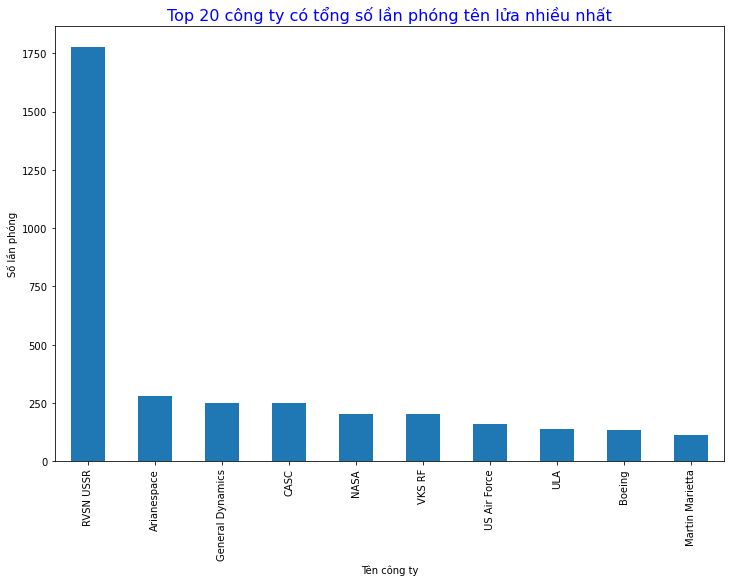

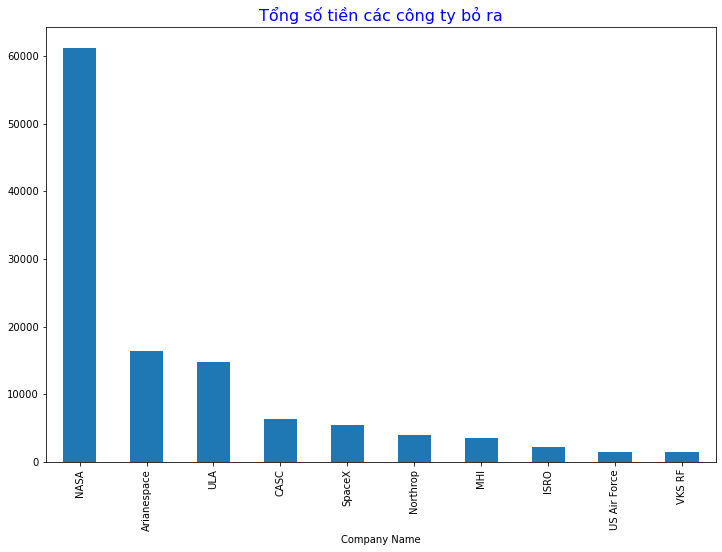

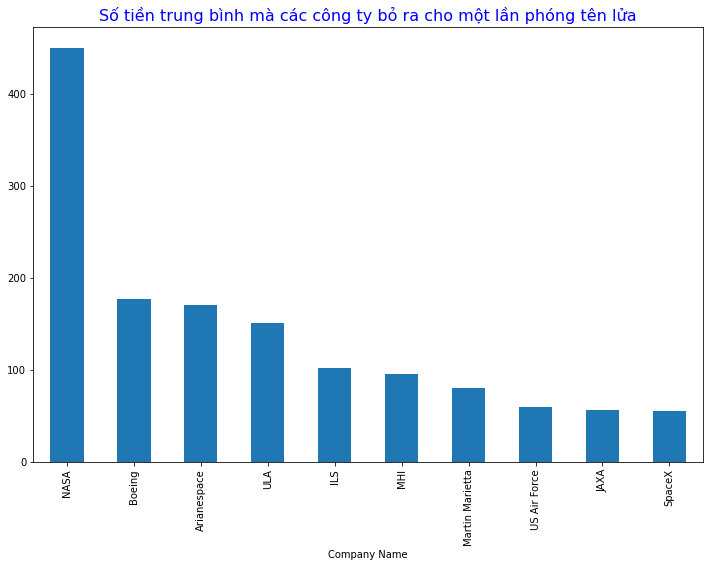

In [9]:
#Tổng số lần phóng
totalLanchCount = df['Company Name'].value_counts()
totalLanchCount = totalLanchCount.head(10)
plt.figure(figsize=(12,8))
plt.xlabel("Tên công ty")
plt.ylabel("Số lần phóng")
plt.title('Top 20 công ty có tổng số lần phóng tên lửa nhiều nhất'
          ,color = 'blue'
          ,fontsize = 16)
totalLanchCount.plot.bar()

#Tổng số tiền bỏ ra
totalMoneySpend = df[df['Rocket'] > 0]
totalMoneySpend = totalMoneySpend.groupby(['Company Name'])['Rocket'].sum()
totalMoneySpend = totalMoneySpend.sort_values(ascending=False)
totalMoneySpend = totalMoneySpend.head(10)
plt.figure(figsize=(12,8))
plt.title('Tổng số tiền các công ty bỏ ra'
          ,color = 'blue'
          ,fontsize = 16)
totalMoneySpend.plot.bar()

#Số tiền trung bình cho 1 lần phóng tên lửa
AvgMoneySpend = df[df['Rocket'] > 0]
AvgMoneySpend = AvgMoneySpend.groupby(['Company Name'])['Rocket'].mean()
AvgMoneySpend = AvgMoneySpend.sort_values(ascending=False)
AvgMoneySpend = AvgMoneySpend.head(10)
plt.figure(figsize=(12,8))
plt.title('Số tiền trung bình mà các công ty bỏ ra cho một lần phóng tên lửa'
          ,color = 'blue'
          ,fontsize = 16)
AvgMoneySpend.plot.bar()

### Kết Luận

- Hai công ty năng động nhất trong việc phóng tàu vũ trụ là **NASA** và **RVSN USSR**
- Có thể kể đến tiếp theo Arianespace, luôn đứng trong top 3 ở trong cả 3 tiêu chí xét

*Chú ý* : việc RVSN cao vượt trội ở biểu đồ số lần phóng nhưng mất hút ở cả 2 biểu đồ còn lại về số tiền có thể được giải thích do dữ liệu bị thiếu sót. Vì vậy mức độ tin cậy ở 2 biểu đồ về tiền là không cao.

**2. Đâu là thời gian đẹp nhất để phóng tên lửa?**

Dựa vào các mẫu có sẳn ta có thể lựa chọn đựa thời gian phóng tên lửa tốt nhất theo xác xuất, dựa trên:
* Tháng phóng tên lửa
* Ngày phóng tên lửa
* Ngày nào trong tuần
* Giờ phóng tên lửa

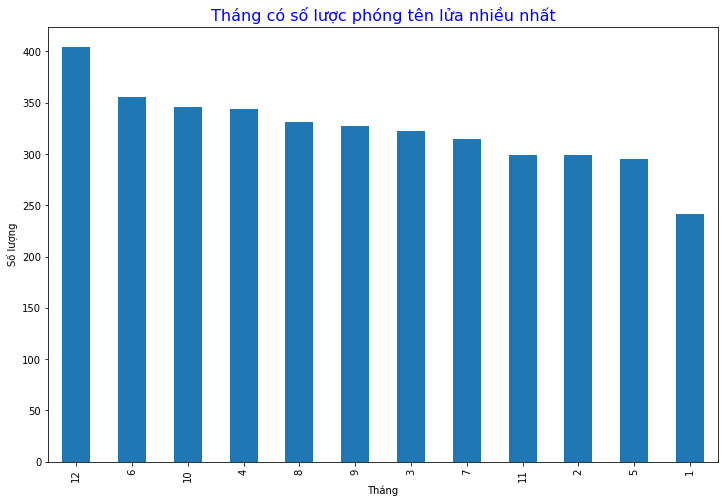

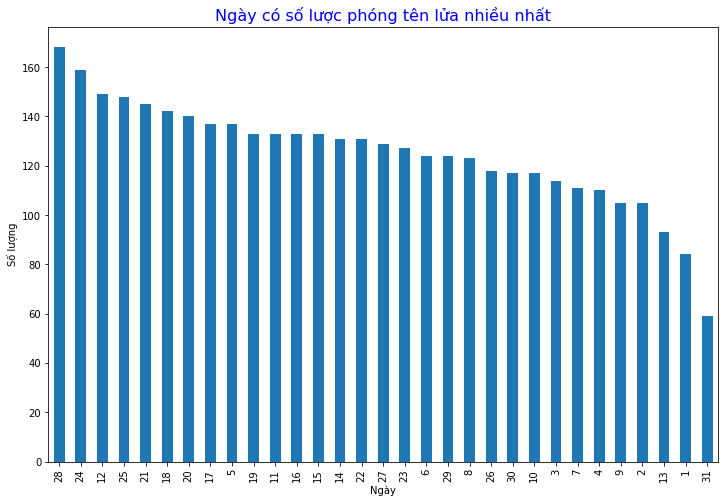

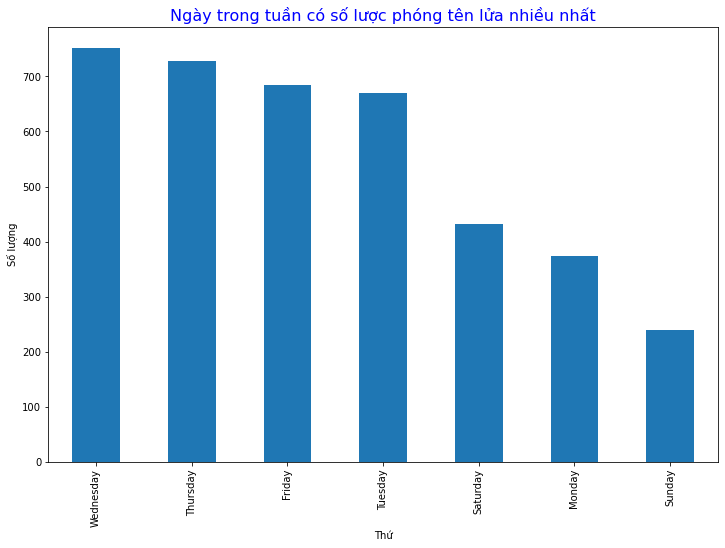

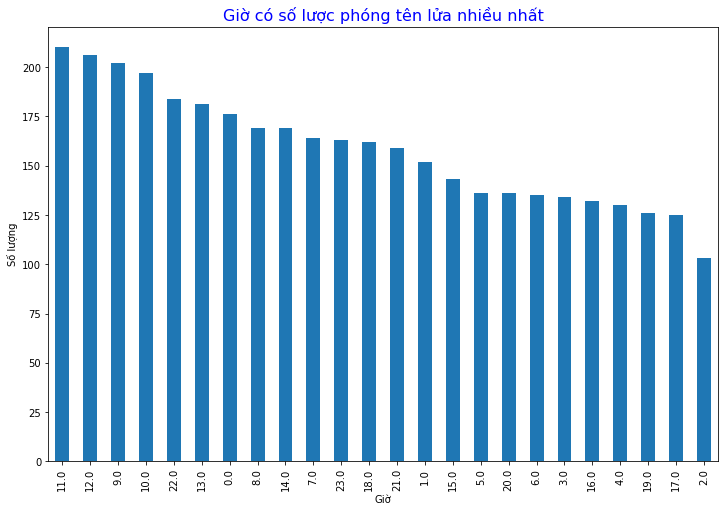

In [10]:
Month = df[df['Status Mission'] ==  'Success']['Month'].value_counts()
plt.figure(figsize=(12,8))
plt.xlabel("Tháng")
plt.ylabel("Số lượng")
plt.title('Tháng có số lược phóng tên lửa nhiều nhất'
          ,color = 'blue'
          ,fontsize = 16)
Month.plot.bar()

Day = df[df['Status Mission'] ==  'Success']['Day'].value_counts()
plt.figure(figsize=(12,8))
plt.xlabel("Ngày")
plt.ylabel("Số lượng")
plt.title('Ngày có số lược phóng tên lửa nhiều nhất'
          ,color = 'blue'
          ,fontsize = 16)
Day.plot.bar()

dayOfWeek = df[df['Status Mission'] ==  'Success']['Weekday'].value_counts()
plt.figure(figsize=(12,8))
plt.xlabel("Thứ")
plt.ylabel("Số lượng")
plt.title('Ngày trong tuần có số lược phóng tên lửa nhiều nhất'
          ,color = 'blue'
          ,fontsize = 16)
dayOfWeek.plot.bar()


Hour = df[df['Status Mission'] ==  'Success']['Hour'].value_counts()
plt.figure(figsize=(12,8))
plt.xlabel("Giờ")
plt.ylabel("Số lượng")
plt.title('Giờ có số lược phóng tên lửa nhiều nhất'
          ,color = 'blue'
          ,fontsize = 16)
Hour.plot.bar()

Từ 4 biểu đồ trên, với dữ liệu từ những lần phóng thành công trước đó ta có các nhận xét:
+ Tháng 12 có số lần phóng thành công cao nhất trong 12 tháng
+ ngày 28 và 24 là ngày có số lượng phóng thành công cao nhất
+ Ba ngày giữa tuần Thứ 4, Thứ 5, Thứ 6 là 3 ngày trong tuần có số lượng phóng thành công cao nhất
+ Có 4 giờ có số lượng phóng thành công cao nhất là 9h, 10h, 11h, và 12h

### Kết Luận
- Từ những tham số từ lịch sữ, ta có thể chọn ra được ngày phóng tên lửa có xác xuất thành công cao nhất đó là

tháng **12**

ngày (**28** hoặc **24**) nhằm vào (**Thứ 4 Thứ 5 hoặc Thứ 6**) trong tuần

khoảng thời gian phóng từ **9h sáng đến 13h chiều**

**3.Lựa chọn tên lửa nào cho lần phóng tiếp theo?**

Sau khi đã chọn được thời gian ta chọn loại tên lửa được cho là an toàn nhất để thực hiện vào không gian

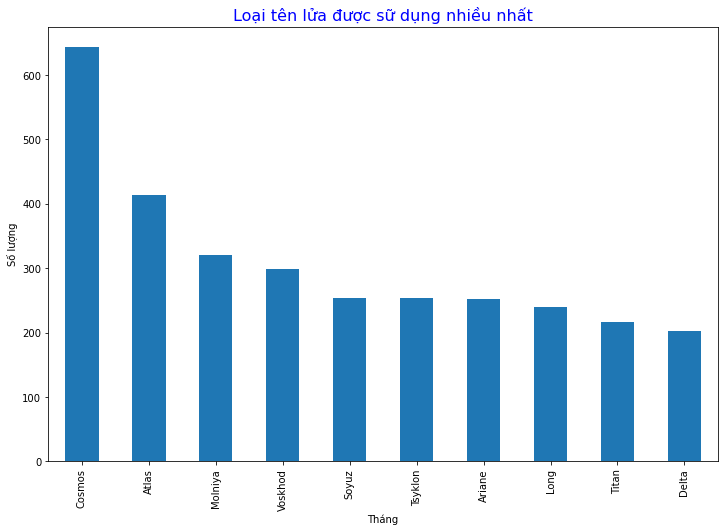

In [16]:
Month = df['LV'].value_counts()
Month = Month.head(10)
plt.figure(figsize=(12,8))
plt.xlabel("Tháng")
plt.ylabel("Số lượng")
plt.title('Loại tên lửa được sữ dụng nhiều nhất'
          ,color = 'blue'
          ,fontsize = 16)
Month.plot.bar()

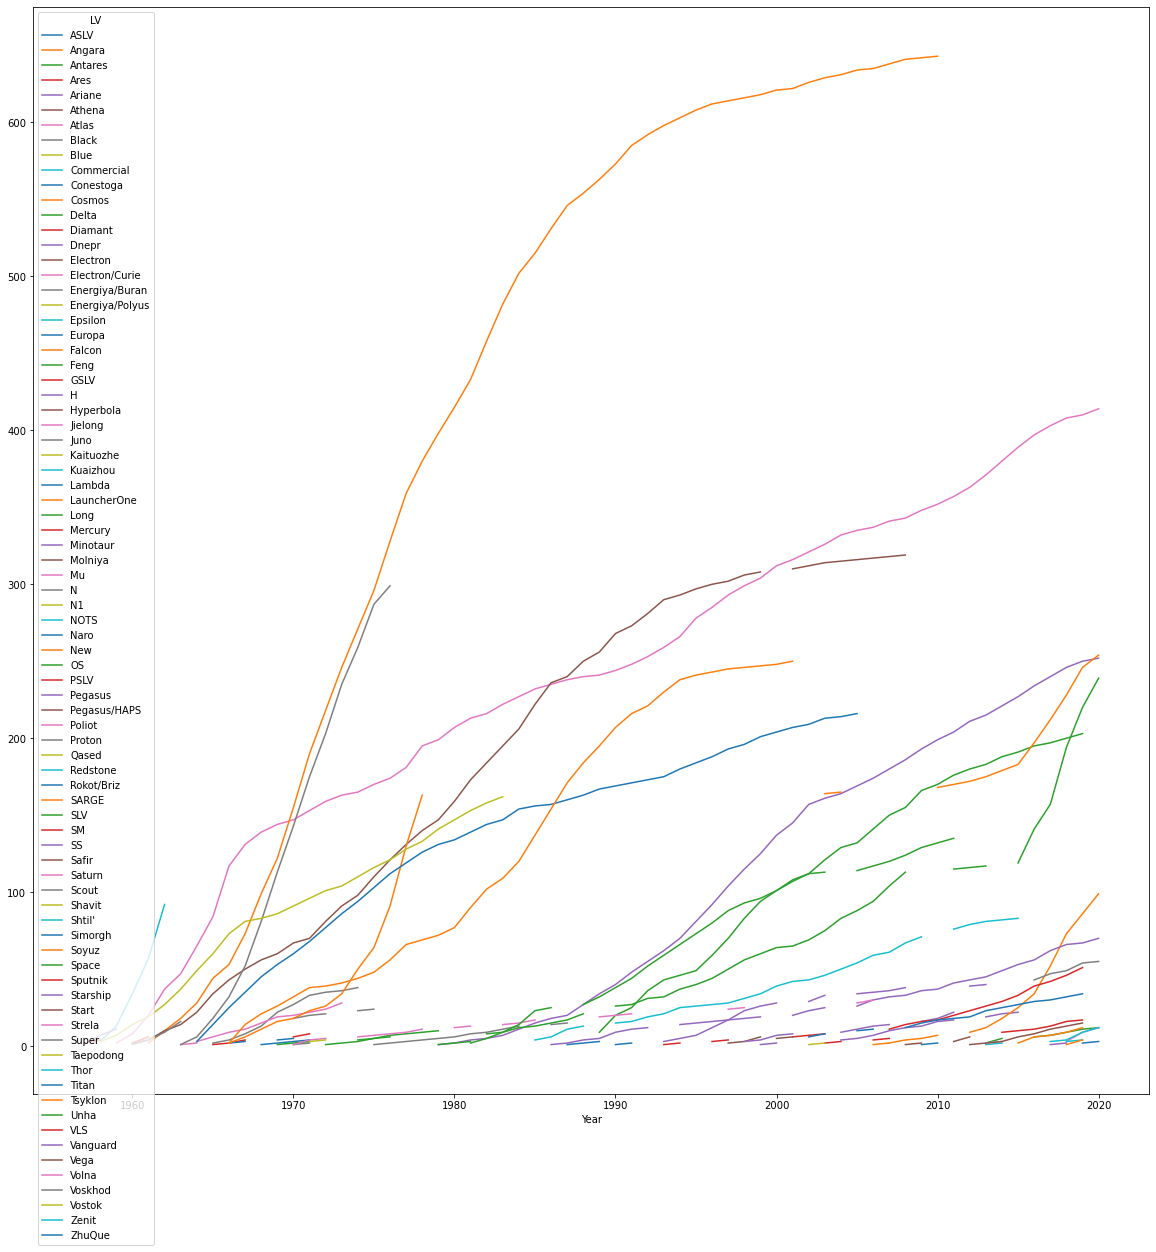

In [12]:
df1 = df.groupby(['Year','LV'])['Year'].count().unstack('LV')
df1= df1.cumsum()
df1.plot(figsize=(20,20));

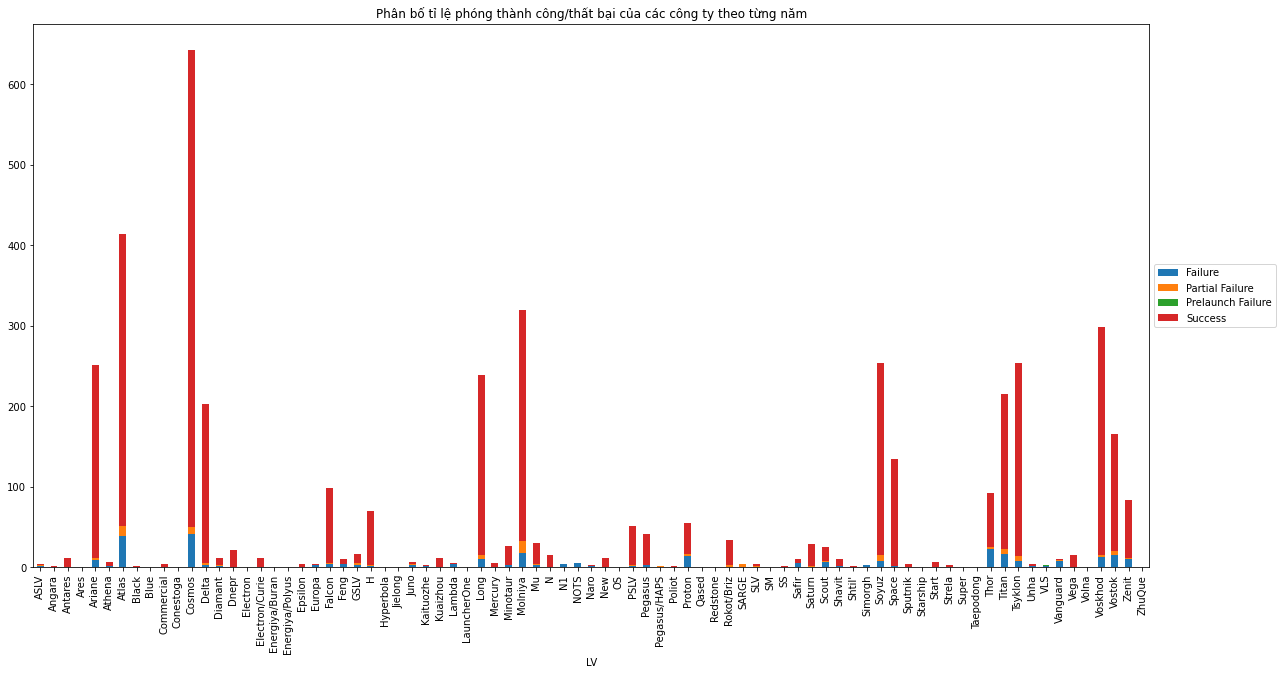

In [13]:
RocketType = df.groupby(['Status Mission'])['LV'].value_counts().unstack('Status Mission').fillna(0)
RocketType[RocketType.columns].plot(title='Phân bố tỉ lệ phóng thành công/thất bại của từng loại tên lửa',
                      kind='bar', stacked=True,figsize=(20,10)).legend(loc='center left',bbox_to_anchor=(1.0, 0.5))

### Kết luận

* Từ 3 biểu đô trên thấy việc lựa chọn tên lửa không dễ dàng gì khi các tính năng này chúng ta dùng để dự đoán không có mức độ liên quan quá lớn đối với việc trả lời câu hỏi này, tuy nhiên nếu không quá khắc khe thì ta có thể chọn các tên lửa là các tên lửa có số lần sữ dụng lớn và vẫn được sữ dụng đến ngày nay là **Arias**

*Phân bố các lần phóng tên lửa của từng công ty theo năm*

**4. Tỉ lệ thành công thất bại của các lần phóng là bao nhiêu**

Sau những tất thì tất cả chỉ là dự đoán dựa trên xác xuất, ta không thể bỏ qua trường hợp thất bại được, vậy trường hợp ta thất bại trong việc đưa tên lửa ra ngoài quỹ đạo là bao nhiêu?

Text(0.5, 1.0, 'Tỉ lệ thành công thất bại')

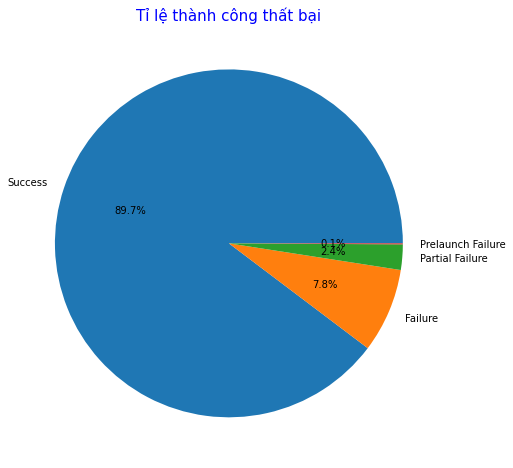

In [14]:
labels = df['Status Mission'].value_counts().index
explode = [0,0.2]
sizes = df['Status Mission'].value_counts().values

plt.figure(0,figsize = (8,8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%')
plt.title('Tỉ lệ thành công thất bại',color = 'blue',fontsize = 15)

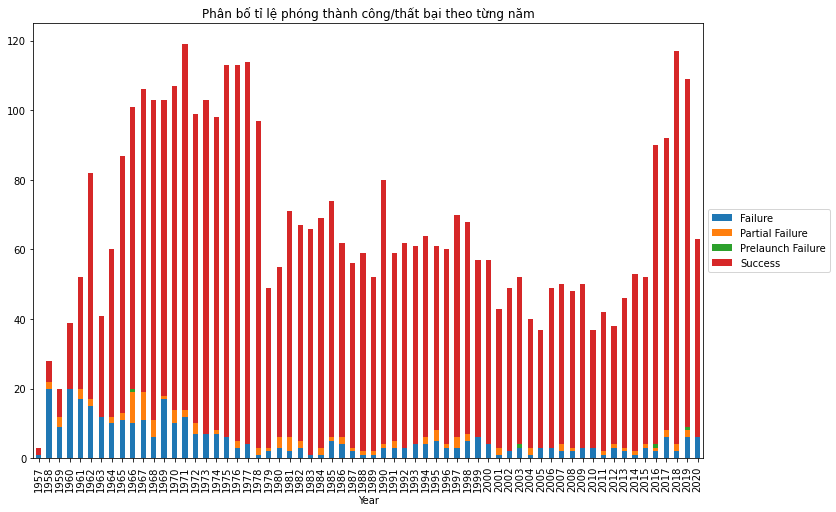

In [15]:
df2 = df.groupby(['Year','Status Mission'])['Year'].count().unstack('Status Mission').fillna(0)
df2[df2.columns].plot(title='Phân bố tỉ lệ phóng thành công/thất bại theo từng năm',
                      kind='bar', stacked=True,figsize=(12,8)).legend(loc='center left',bbox_to_anchor=(1.0, 0.5))

## Kết luận

* Theo tỉ lệ thì 1 lần phóng tên lửa có tỉ lệ thất bại trên 10%, đây là 1 con số khá lớn vì ta biết số tiền bỏ ra trong 1 lần phóng tên lửa là rất lớp.
* Tiếp đến ta xét mức độ thất bại theo từng năm, ta thấy tỉ lệ thất bại đã giảm đi nhiều so với thời kì ban đầu nhưng một lần nữa những con số vẫn cho thấy rằng tỉ lệ thất bại vẫn là khá cao khoảng 5 đến 10% dù đời thật ta biết các siêu máy tính đã tối ưa hoá khá tốt các biến môi trường.

Qua những câu hỏi và câu trả lời trên, tuy không giúp ta thấy được quá chi tiết về ngành khoa học vũ trụ này tuy nhiên nó đã cho ta thấy một cái nhìn bao quát về lịch sữ phát triễn của của việc đưa các tên lửa do con người chế tạo ra không gian

## NHÌN LẠI QUÁ TRÌNH LÀM ĐỒ ÁN

* Khó khăn: việc lựa chọn được một dataset phù hợp và đưa ra các câu hỏi hợp lí là khá tốn thời gian, chiếm khoảng 2/3 tổng thời gian làm đồ án
* Học được nhiều cách phân tích dữ liệu và tổng quát hoá bằng việc xem nhiều các bài trình bày của các bạn trong lớp, nhiều chủ đề quá đó biết được thông tin bổ ích
* Vì tập data này là khá nhỏ (chỉ có khoảng 7-8 cột) nên việc tìm ra hướng phát triển thêm bài làm là khá khó, vì vậy ta chỉ có thể chờ tập dữ liệu bổ sung hoặc tìm tập dữ liệu khác có liên quan để bổ trợ thêm 

## TÀI LIỆU THAM KHẢO

Tham khảo các tài liệu từ các notebook có sẳn trên [Kaggle](https://www.kaggle.com/agirlcoding/all-space-missions-from-1957/notebooks)